In [159]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import matplotlib as mpl

COLOR = "black"
mpl.rcParams["text.color"] = "black"
mpl.rcParams["axes.labelcolor"] = COLOR
mpl.rcParams["xtick.color"] = COLOR
mpl.rcParams["ytick.color"] = COLOR

MC Run

In [160]:
import pickle

with open("2_saved_runs/df_scores_221118_v3.pickle", "rb") as handle:
    df_scores = pickle.load(handle)
with open("2_saved_runs/MC_run_221118_v2.pickle", "rb") as handle:
    results_mc = pickle.load(handle)
df_results, model_data = results_mc["df_results"], results_mc["model_data"]


In [177]:
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", 100)
# cols = [ 'param_index', 'll', 'AIC', 'BIC', 'silhouette', 'll_rank', 'AIC_rank', 'BIC_rank',"TOTAL_rank", 'silhouette_rank',"CH_rank", 'identified_cluster', "N_cluster",'True_Cluster_number']
dataset = 8
init_routine = "random_inside"
criterion = "Total_rank_rank"

df_select = df_scores.loc[(df_scores.dataset == dataset) & (df_scores.init_routine == init_routine), :].sort_values(
    criterion
)
# df_select = df_select[df_select.identified_cluster == df_select.identified_cluster.max()]
print(f"best model: {int(df_select.number_identified_cluster.max())} identified clusters")
candidate_model_idx = df_select.groupby(["N_cluster"])[["model_idx"]].first().model_idx
df_candidates = df_select.loc[df_select.model_idx.isin(candidate_model_idx)]
df_candidates

best model: 6 identified clusters


,model_idx,iterations,execution_time,total_execution_time,total_iterations,em_model_idx,reiterations,dataset,init_routine,N_cluster,True_N_Cluster,ll_score,AIC_score,BIC_score,MML_score,silhouette_score,CH_score,Total_proportional_score,ll_rank,AIC_rank,BIC_rank,MML_rank,silhouette_rank,CH_rank,Total_proportional_rank,Total_rank_score,Total_rank_rank,number_identified_cluster,adjusted_rand_score
1510,1510,16,1.412286,1.421946,20,70,4,8,random_inside,4,7,-139.149003,155.149003,186.774950,172.104531,0.477648,1367.622741,0.848007,3,3,3,3,8,12,25,32,1,4.0,0.525437
1493,1493,37,1.077115,1.082878,41,53,4,8,random_inside,3,7,-152.778652,164.778652,188.498112,179.226778,0.478178,1874.279750,0.873801,13,12,9,11,7,5,10,57,5,3.0,0.483752
1547,1547,24,1.515228,1.519013,25,107,1,8,random_inside,6,7,-153.433717,177.433717,224.872637,195.995857,0.271232,1336.440408,0.821149,19,26,29,26,46,17,38,163,26,4.0,0.546643
1529,1529,21,1.347325,1.359188,25,89,4,8,random_inside,5,7,-149.551840,169.551840,209.084273,188.447146,0.269953,1026.775956,0.805314,12,23,25,24,48,46,63,178,30,5.0,0.591057
1573,1573,22,2.421114,2.444108,26,133,4,8,random_inside,7,7,-184.627999,212.627999,267.973405,230.457770,0.253824,1298.420881,0.816688,37,38,46,39,58,21,48,239,39,4.0,0.546239
1594,1594,20,2.517021,2.550663,28,154,8,8,random_inside,8,7,-233.898315,265.898315,329.150208,282.199606,0.263486,1271.166575,0.815844,66,69,82,67,54,27,49,365,55,4.0,0.561415
1473,1473,12,0.187362,0.189555,14,33,2,8,random_inside,2,7,-355.784384,363.784384,379.597357,375.348232,0.572613,2898.900913,0.935165,126,122,100,115,1,1,1,465,76,1.0,0.341569
1614,1614,10,1.709377,1.728025,13,174,3,8,random_inside,9,7,-245.013228,281.013228,352.171608,298.943437,0.205742,831.914888,0.786276,73,74,93,74,77,80,97,471,79,4.0,0.528216
1445,1445,2,0.047606,0.047606,2,5,0,8,random_inside,1,7,-569.386550,573.386550,581.293037,580.557392,0.000000,0.000000,0.715708,159,158,155,158,124,131,161,885,140,0.0,0.000000


In [178]:
df_select[df_select.number_identified_cluster == df_select.number_identified_cluster.max()].head(10)

,model_idx,iterations,execution_time,total_execution_time,total_iterations,em_model_idx,reiterations,dataset,init_routine,N_cluster,True_N_Cluster,ll_score,AIC_score,BIC_score,MML_score,silhouette_score,CH_score,Total_proportional_score,ll_rank,AIC_rank,BIC_rank,MML_rank,silhouette_rank,CH_rank,Total_proportional_rank,Total_rank_score,Total_rank_rank,number_identified_cluster,adjusted_rand_score
1542,1542,14,0.912216,0.949557,23,102,9,8,random_inside,6,7,-156.666599,180.666599,228.105519,198.840309,0.308215,1077.984034,0.812416,27,28,30,28,30,38,53,181,31,6.0,0.624513
1567,1567,21,1.581705,1.581705,21,127,0,8,random_inside,7,7,-240.298215,268.298215,323.643622,288.805636,0.265213,996.099600,0.802005,70,71,79,72,53,52,74,397,58,6.0,0.548785
1598,1598,18,1.136028,1.136028,18,158,0,8,random_inside,8,7,-252.640749,284.640749,347.892643,303.149341,0.210803,747.427806,0.782551,75,79,88,87,75,99,102,503,87,6.0,0.576143
1588,1588,6,0.624936,0.671138,15,148,9,8,random_inside,8,7,-287.158150,319.158150,382.410044,339.270139,0.181344,874.393203,0.785051,97,99,110,99,83,69,99,557,96,6.0,0.572405
1616,1616,12,1.654017,1.906198,50,176,38,8,random_inside,9,7,-318.870029,354.870029,426.028409,376.674291,0.013821,850.635168,0.763134,113,115,129,124,120,76,134,677,111,6.0,0.509339
1619,1619,10,1.185280,1.230183,18,179,8,8,random_inside,9,7,-325.396056,361.396056,432.554436,383.222729,0.062290,791.335851,0.765903,116,119,134,129,103,91,127,692,115,6.0,0.553257
1603,1603,14,1.617470,1.672769,22,163,8,8,random_inside,9,7,-325.183806,361.183806,432.342186,382.301387,0.048372,643.432018,0.756685,115,118,133,127,107,114,141,714,118,6.0,0.576702
1607,1607,6,0.853911,0.871146,9,167,3,8,random_inside,9,7,-376.267649,412.267649,483.426029,433.854420,0.036271,909.702037,0.768197,137,139,141,139,114,62,124,732,121,6.0,0.522925


In [179]:
df_select[df_select.N_cluster == 6]

,model_idx,iterations,execution_time,total_execution_time,total_iterations,em_model_idx,reiterations,dataset,init_routine,N_cluster,True_N_Cluster,ll_score,AIC_score,BIC_score,MML_score,silhouette_score,CH_score,Total_proportional_score,ll_rank,AIC_rank,BIC_rank,MML_rank,silhouette_rank,CH_rank,Total_proportional_rank,Total_rank_score,Total_rank_rank,number_identified_cluster,adjusted_rand_score
1547,1547,24,1.515228,1.519013,25,107,1,8,random_inside,6,7,-153.433717,177.433717,224.872637,195.995857,0.271232,1336.440408,0.821149,19,26,29,26,46,17,38,163,26,4.0,0.546643
1542,1542,14,0.912216,0.949557,23,102,9,8,random_inside,6,7,-156.666599,180.666599,228.105519,198.840309,0.308215,1077.984034,0.812416,27,28,30,28,30,38,53,181,31,6.0,0.624513
1559,1559,12,0.599871,0.622875,17,119,5,8,random_inside,6,7,-165.631466,189.631466,237.070386,206.118201,0.282076,1103.725377,0.810466,29,30,34,30,41,33,55,197,33,4.0,0.565307
1543,1543,7,0.418938,0.418938,7,103,0,8,random_inside,6,7,-192.750026,216.750026,264.188946,235.433489,0.276247,1315.260004,0.820221,38,43,45,44,42,18,41,230,37,4.0,0.550370
1540,1540,11,1.151662,1.151662,11,100,0,8,random_inside,6,7,-176.391810,200.391810,247.830730,218.453656,0.265634,1079.573940,0.807116,33,36,38,36,52,36,61,231,38,4.0,0.559816
1557,1557,10,0.926155,0.931588,11,117,1,8,random_inside,6,7,-203.770597,227.770597,275.209517,247.345506,0.270510,939.403327,0.800240,47,47,48,47,47,58,77,294,47,3.0,0.523251
1558,1558,15,0.813021,0.843919,23,118,8,8,random_inside,6,7,-213.431052,237.431052,284.869972,255.291746,0.239410,1155.186696,0.807367,51,52,54,51,64,30,59,302,48,4.0,0.536499
1541,1541,9,0.549322,0.567999,13,101,4,8,random_inside,6,7,-217.026975,241.026975,288.465895,258.944553,0.242378,1078.800109,0.803791,53,53,56,54,63,37,64,316,50,3.0,0.538840
1551,1551,17,1.679405,1.688063,19,111,2,8,random_inside,6,7,-227.705601,251.705601,299.144521,270.987577,0.320785,883.539083,0.803201,65,64,60,64,28,68,65,349,53,3.0,0.505829
1555,1555,8,0.885813,0.939732,23,115,15,8,random_inside,6,7,-208.332262,232.332262,279.771182,248.974915,0.163267,816.684851,0.780961,48,49,50,48,85,83,104,363,54,4.0,0.583055


In [163]:
from clustering.model_selection.multi_model_mimicry.multi_model_mimicry import MultiModelMimicryParameter

mmm_params = {
    "N_bs": 50,
    "criterion": "ll_score",
    "n_neighbors": 10,
    "pca_n_components": 2,
    
    "emc": {
        "parallel": {"n_jobs": 14, "verbose": 11},
        "cluster_init": {
            "init_routine": "random_inside",
            "routine": {
                "N_runs_per_clusternumber": 3,
                "N_max": 5000,
            },
        },
        "em": {
            "max_reiterations": 5000,
            "em_algorithm": {
                "em_tol": 1e-3,
                "max_iter": 1000,
                "min_mix_coef": 0.02,
            },
        },
    },
}

In [164]:
from clustering.model_selection.multi_model_mimicry.multi_model_mimicry import MultiModelMimicry
mmm = MultiModelMimicry(df_scores, model_data, **mmm_params)
mmm.select_candidate_models(list(df_candidates.iloc[:4].model_idx)) #best for results
mmm.run()

[Parallel(n_jobs=14)]: Using backend LokyBackend with 14 concurrent workers.
[Parallel(n_jobs=14)]: Done   1 tasks      | elapsed:    7.1s
[Parallel(n_jobs=14)]: Done   2 tasks      | elapsed:    7.7s
[Parallel(n_jobs=14)]: Done   3 tasks      | elapsed:    7.8s
[Parallel(n_jobs=14)]: Done   4 tasks      | elapsed:    8.4s
[Parallel(n_jobs=14)]: Done   5 tasks      | elapsed:    8.5s
[Parallel(n_jobs=14)]: Done   6 tasks      | elapsed:    8.7s
[Parallel(n_jobs=14)]: Done   7 tasks      | elapsed:    8.8s
[Parallel(n_jobs=14)]: Done   8 tasks      | elapsed:    9.4s
[Parallel(n_jobs=14)]: Done   9 tasks      | elapsed:    9.6s
[Parallel(n_jobs=14)]: Done  10 tasks      | elapsed:    9.6s
[Parallel(n_jobs=14)]: Done  11 tasks      | elapsed:   10.8s
[Parallel(n_jobs=14)]: Done  12 tasks      | elapsed:   11.6s
[Parallel(n_jobs=14)]: Done  13 tasks      | elapsed:   11.8s
[Parallel(n_jobs=14)]: Done  14 tasks      | elapsed:   11.9s
[Parallel(n_jobs=14)]: Done  15 tasks      | elapsed:  

In [171]:
print(f"{tuple(mmm.predict_model())}")
print(f"{tuple(mmm.knn_model_probabilities[0])}")
print(f"{tuple(mmm.candidate_model_idxs)}")

('data_model_1547',)
(0.0, 0.1, 0.4, 0.5)
(1493, 1510, 1529, 1547)


c:\Users\HydraJ\.conda\envs\ba22\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


c:\Users\HydraJ\.conda\envs\ba22\lib\site-packages\seaborn\distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)
c:\Users\HydraJ\.conda\envs\ba22\lib\site-packages\seaborn\distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)


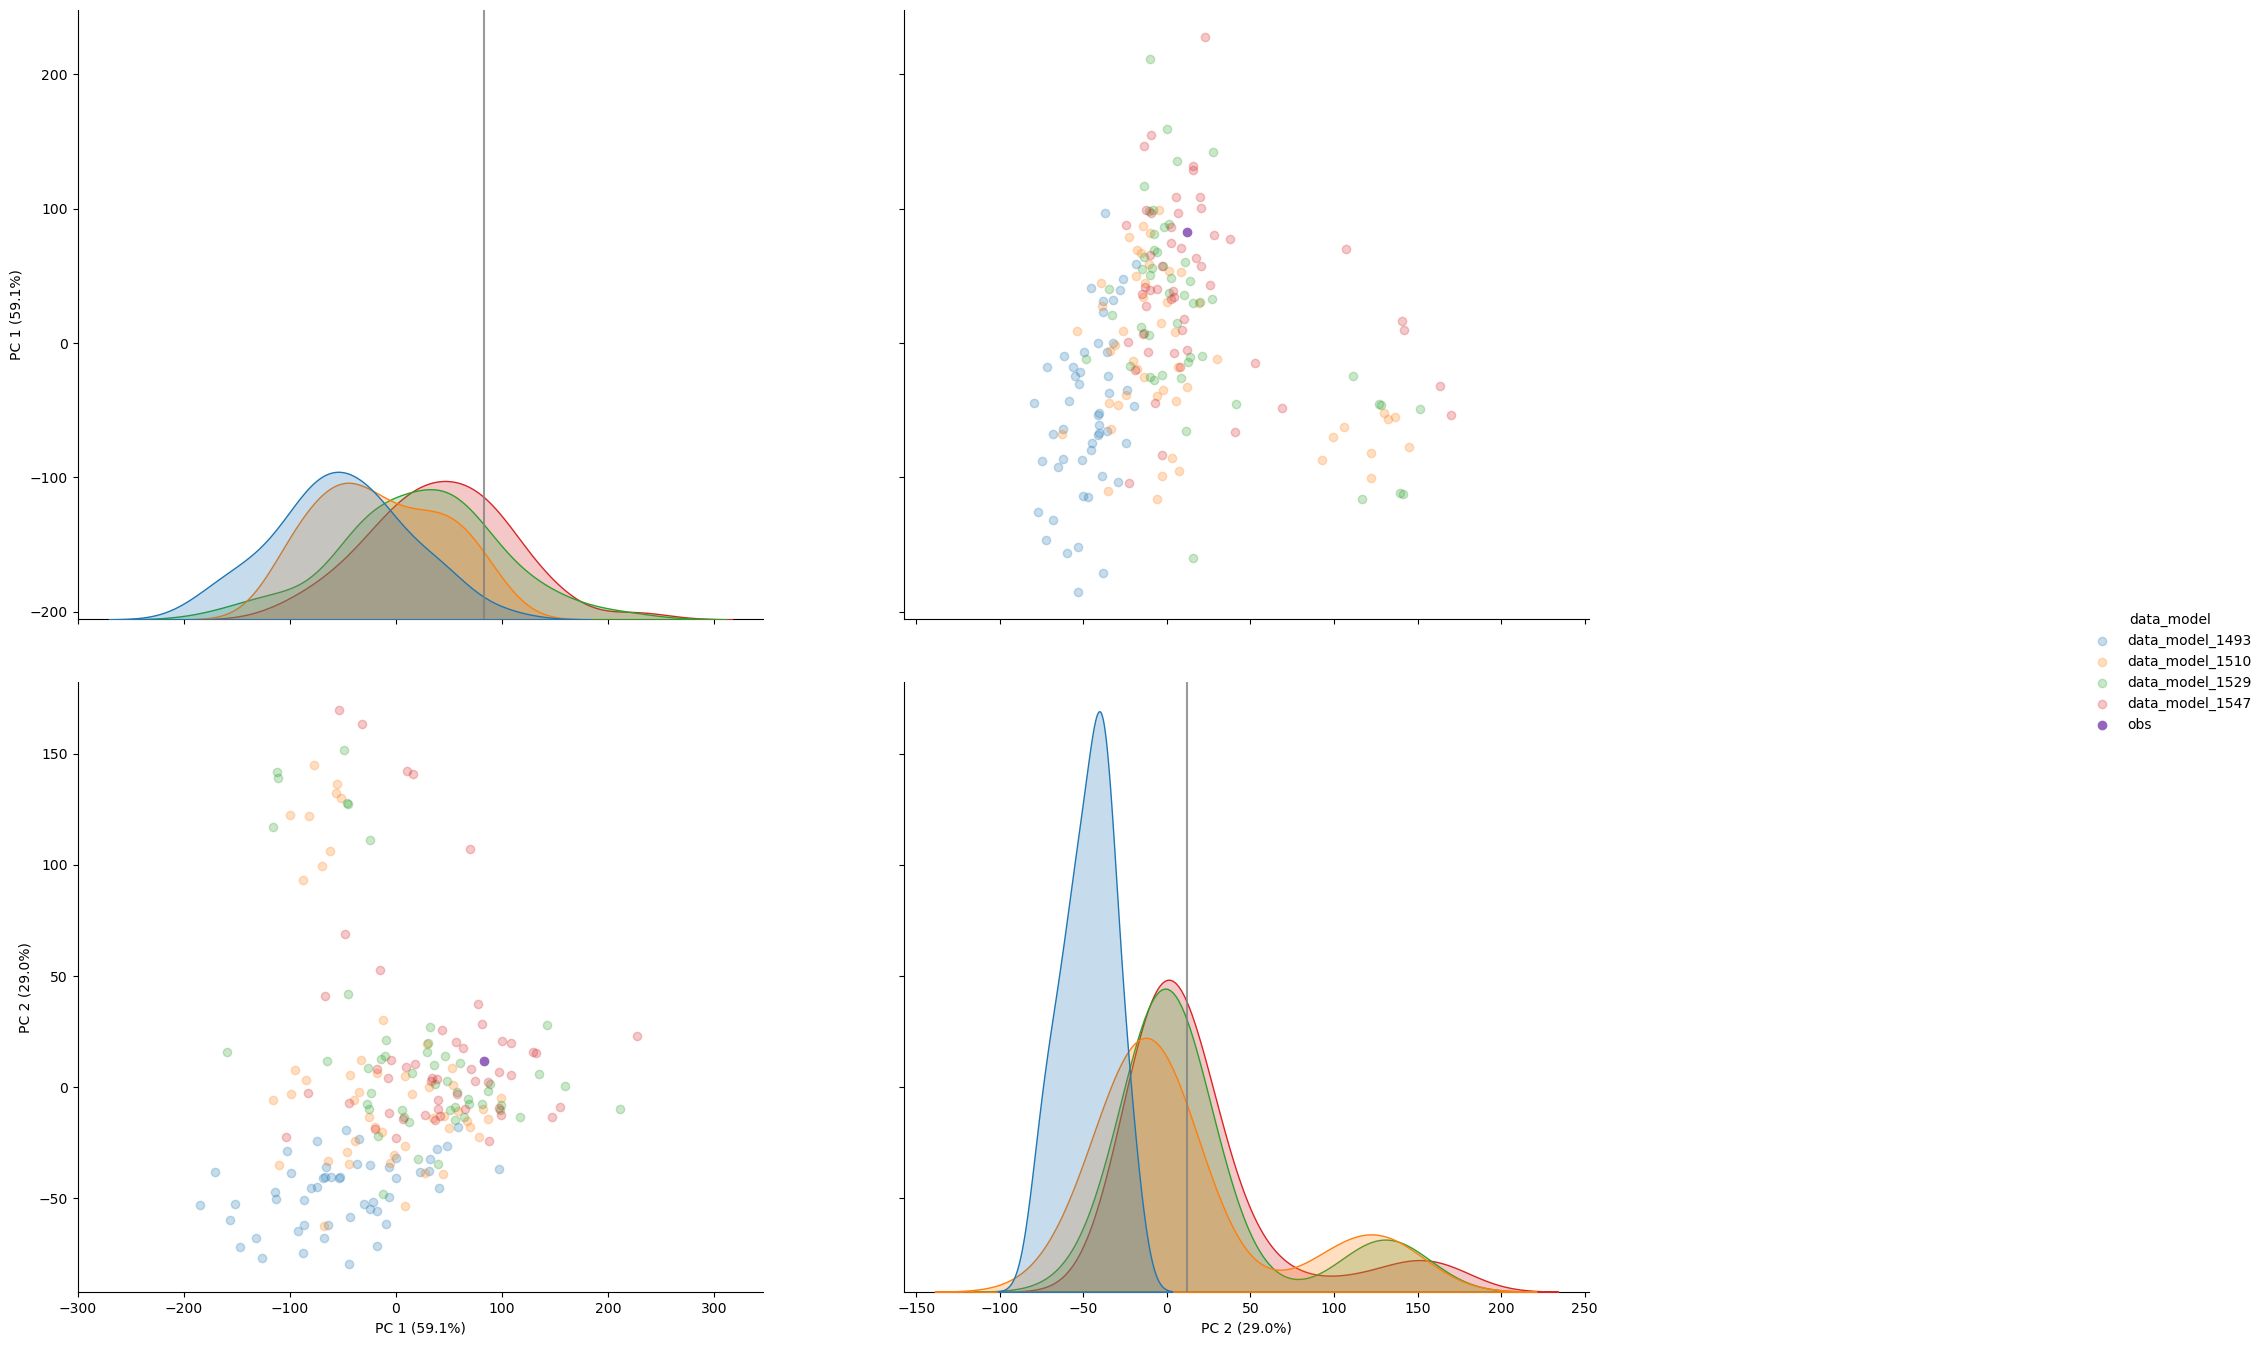

In [172]:
mmm.plot_gofs_PCA_components(pca_n_components=2)

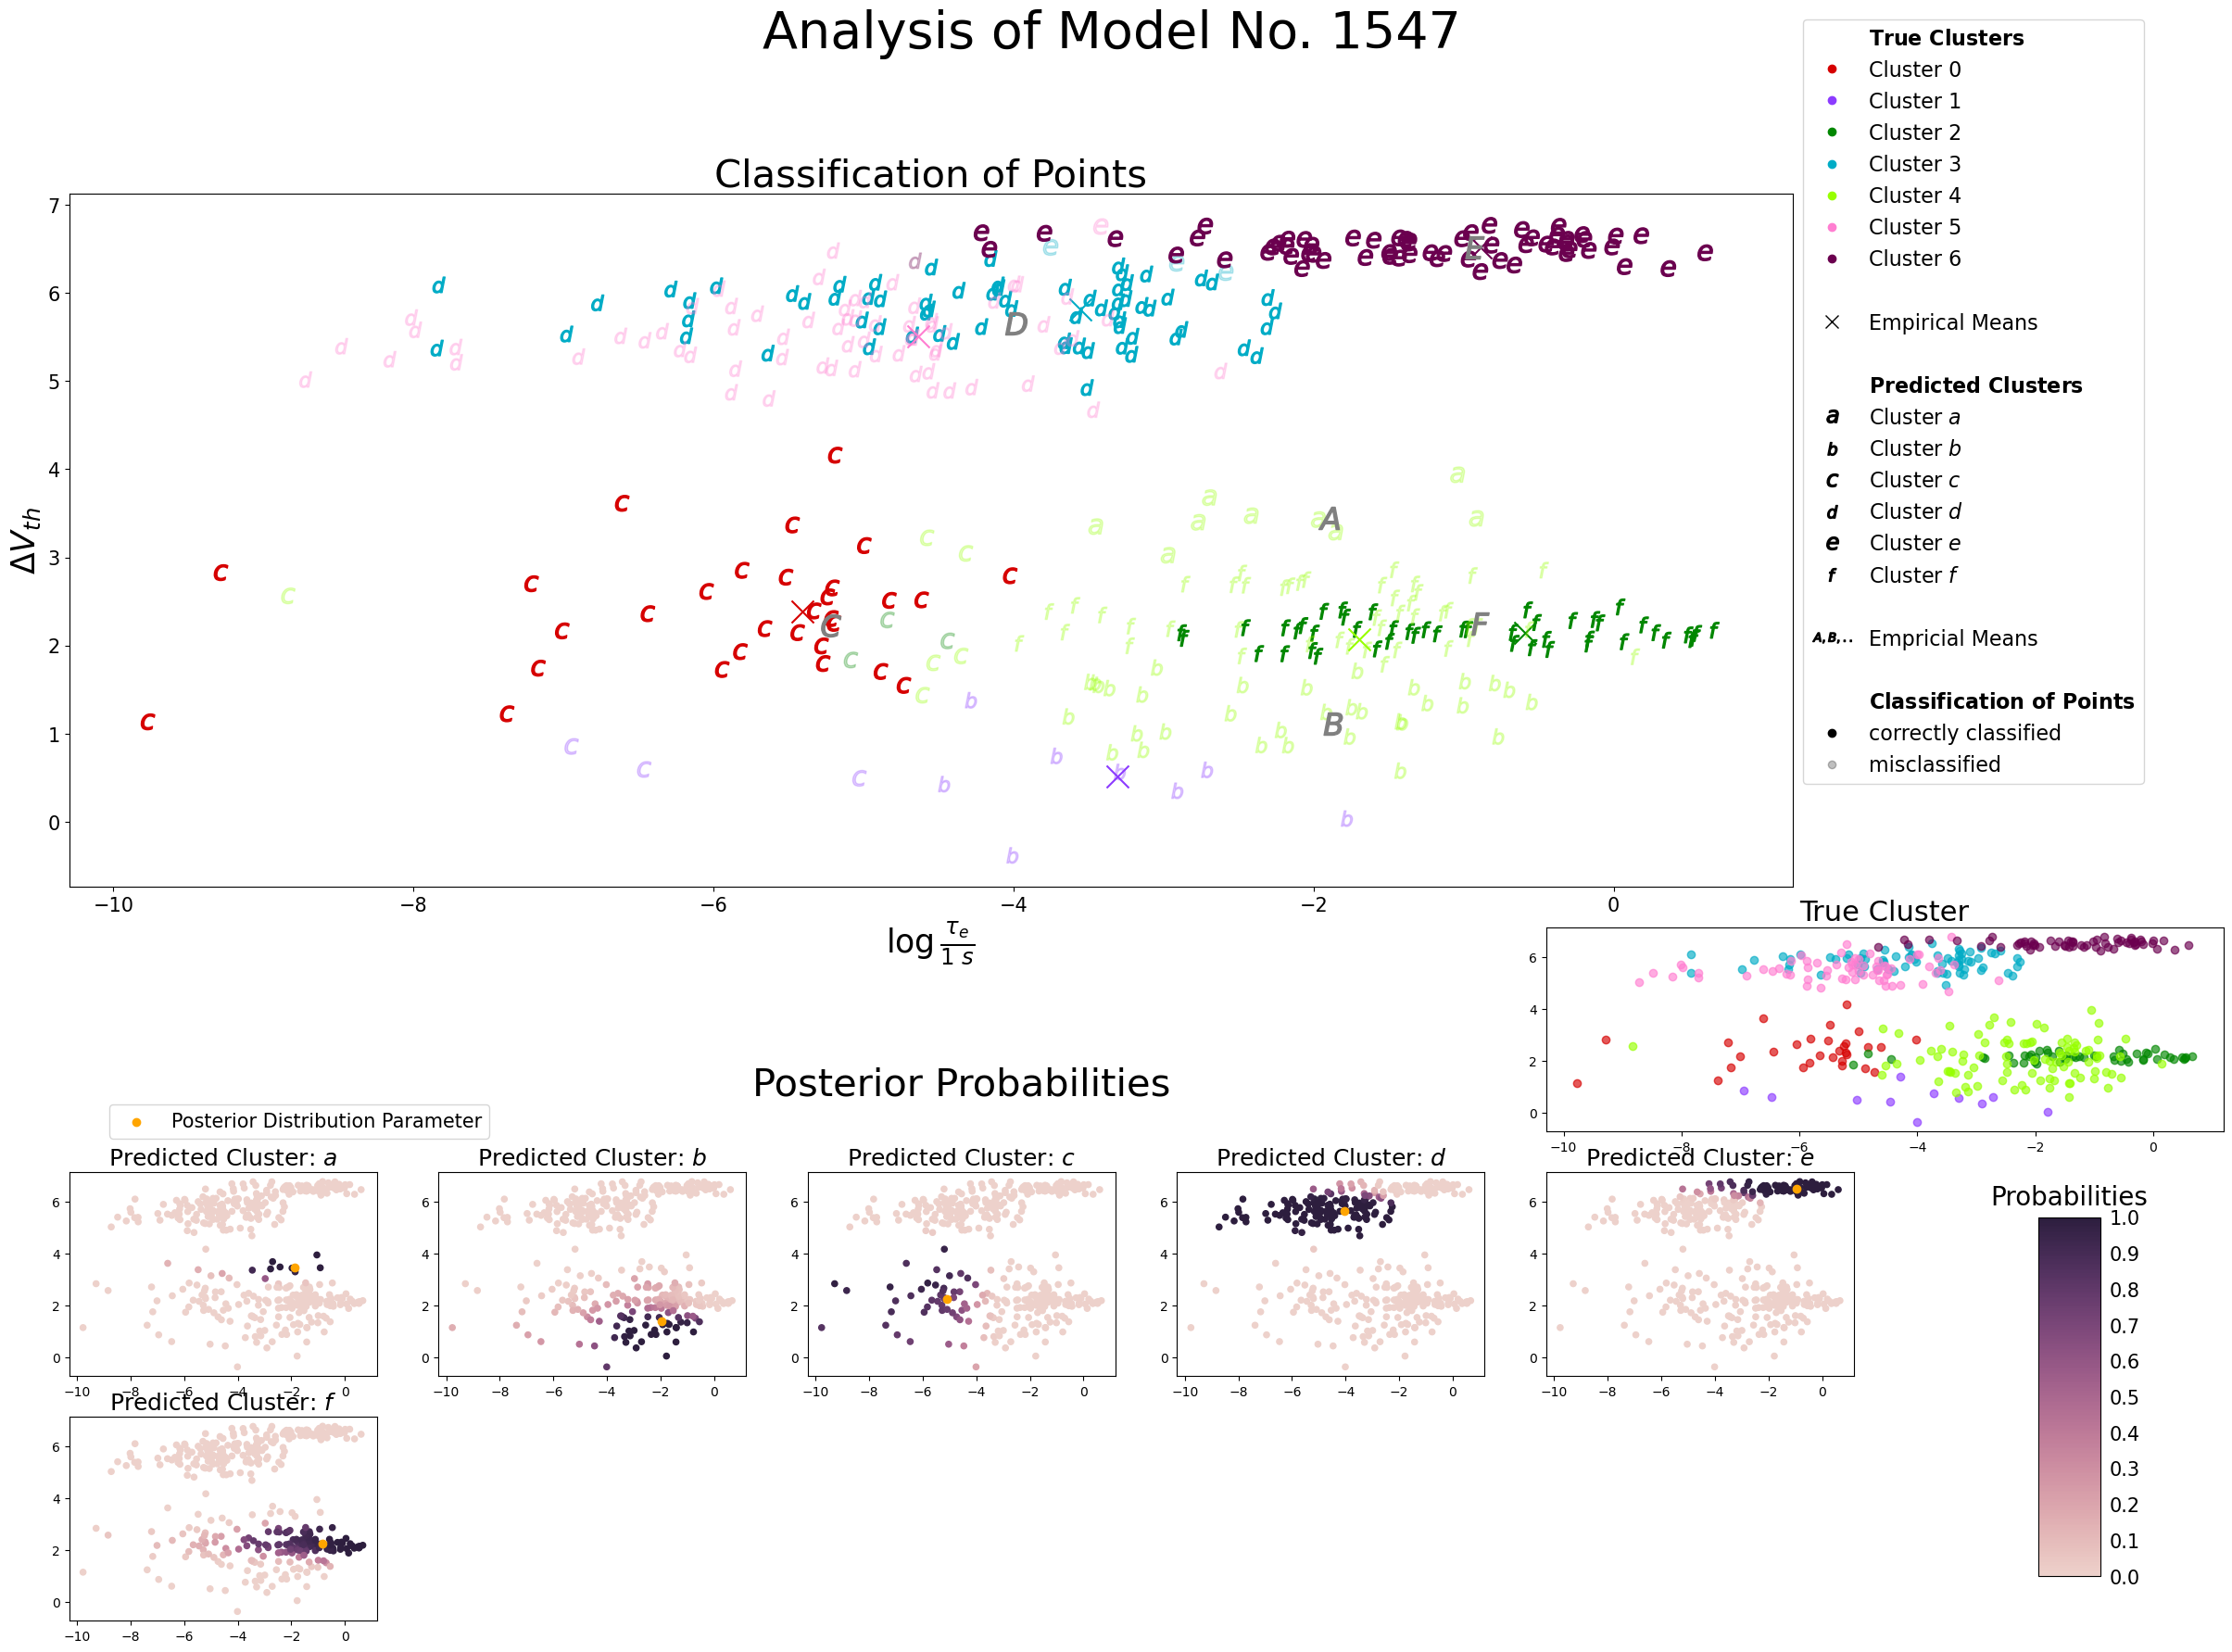

In [175]:
from plotting.clustering_assessment.plot import plot_clustering_assessment

model_idx = 1547
# criterion = "TOTAL_rank"

plot_clustering_assessment(model_data, df_scores, model_idx)

In [169]:
[6028, 6006, 6074]

[6028, 6006, 6074]

In [170]:
pd.set_option("display.max_columns", None)
# cols = [ 'param_index', 'll', 'AIC', 'BIC', 'silhouette', 'll_rank', 'AIC_rank', 'BIC_rank',"TOTAL_rank", 'silhouette_rank',"CH_rank", 'identified_cluster', "N_cluster",'True_Cluster_number']
dataset = 75
init_routine = "random_inside"
criterion = "Total_rank_rank"

df_select = df_scores.loc[(df_scores.dataset == dataset) & (df_scores.init_routine == init_routine), :].sort_values(
    criterion
)
# df_select = df_select[df_select.identified_cluster == df_select.identified_cluster.max()]
print(f"best model: {int(df_select.number_identified_cluster.max())} identified clusters")
df_select.iloc[0:100]

best model: 5 identified clusters


,model_idx,iterations,execution_time,total_execution_time,total_iterations,em_model_idx,reiterations,dataset,init_routine,N_cluster,True_N_Cluster,ll_score,AIC_score,BIC_score,MML_score,silhouette_score,CH_score,Total_proportional_score,ll_rank,AIC_rank,BIC_rank,MML_rank,silhouette_rank,CH_rank,Total_proportional_rank,Total_rank_score,Total_rank_rank,number_identified_cluster,adjusted_rand_score
13546,13546,1000,3.196398,3.196398,1000,46,0,75,random_inside,3,6,173.732346,-161.732346,-139.923608,-149.617391,0.354210,219.492419,0.778254,2,1,1,1,1,95,59,101,1,2.0,0.564495
13542,13542,1000,2.905300,2.905300,1000,42,0,75,random_inside,3,6,173.731992,-161.731992,-139.923254,-149.617032,0.354210,219.492419,0.778254,3,2,2,4,1,95,61,107,2,2.0,0.564495
13543,13543,1000,3.842465,3.845891,1002,43,2,75,random_inside,3,6,173.731990,-161.731990,-139.923253,-149.617051,0.354210,219.492419,0.778254,4,3,3,2,1,95,60,108,3,2.0,0.564495
13541,13541,1000,3.678787,3.678787,1000,41,0,75,random_inside,3,6,173.731962,-161.731962,-139.923224,-149.617038,0.354210,219.492419,0.778254,5,4,4,3,1,95,62,112,4,2.0,0.564495
13554,13554,1000,4.475962,4.487840,1004,54,4,75,random_inside,3,6,173.731708,-161.731708,-139.922970,-149.616777,0.354210,219.492419,0.778254,6,5,5,6,1,95,63,118,5,2.0,0.564495
13540,13540,1000,3.589091,3.589091,1000,40,0,75,random_inside,3,6,173.731702,-161.731702,-139.922965,-149.616778,0.354210,219.492419,0.778254,7,6,6,5,1,95,64,120,6,2.0,0.564495
13553,13553,1000,3.410007,3.413203,1002,53,2,75,random_inside,3,6,173.731603,-161.731603,-139.922865,-149.616667,0.354210,219.492419,0.778254,8,7,7,7,1,95,65,125,7,2.0,0.564495
13547,13547,1000,4.582471,4.582471,1000,47,0,75,random_inside,3,6,173.731587,-161.731587,-139.922850,-149.616645,0.354210,219.492419,0.778254,9,8,8,8,1,95,66,129,8,2.0,0.564495
13549,13549,1000,5.487367,5.489299,1001,49,1,75,random_inside,3,6,173.731548,-161.731548,-139.922810,-149.616630,0.354210,219.492419,0.778254,10,9,9,9,1,95,67,133,9,2.0,0.564495
13552,13552,1000,3.312869,3.316629,1002,52,2,75,random_inside,3,6,173.731539,-161.731539,-139.922802,-149.616629,0.354210,219.492419,0.778254,11,10,10,10,1,95,68,137,10,2.0,0.564495
